In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/Llama2/1st_llama2_aigenerated_13_experiment_1691607036476.csv')
data2 = pd.read_csv('results/Llama2/1st_llama2_aigenerated_13_experiment_1691607036476.csv')
data3 = pd.read_csv('results/Llama2/1st_llama2_aigenerated_13_experiment_1691607036476.csv')
# Concatenate the two test data
df = pd.concat([data1, data2, data3], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3.0
1,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,2.0
2,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,2.0
3,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,1.0
4,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 4,2.0
...,...,...,...,...,...
958,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 15,2.0
959,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 16,2.0
960,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 17,2.0
961,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 18,2.0


In [20]:
data1.head

<bound method NDFrame.head of                            llm_model  temperature       system_prompt   
0    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt  \
1    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
2    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
3    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
4    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
..                               ...          ...                 ...   
316  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
317  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
318  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
319  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
320  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0    3.0  
1  

In [21]:
data2.head

<bound method NDFrame.head of                            llm_model  temperature       system_prompt   
0    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt  \
1    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
2    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
3    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
4    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
..                               ...          ...                 ...   
316  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
317  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
318  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
319  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
320  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0    3.0  
1  

In [22]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,CONVERT_TEXT_TO_SPEECH,3.0
1,CONVERT_TEXT_TO_SPEECH,2.0
2,CONVERT_TEXT_TO_SPEECH,2.0
3,CONVERT_TEXT_TO_SPEECH,1.0
4,CONVERT_TEXT_TO_SPEECH,2.0
...,...,...
958,SEND_EMAIL,2.0
959,SEND_EMAIL,2.0
960,SEND_EMAIL,2.0
961,SEND_EMAIL,2.0


In [23]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_aigen13_zeroshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_aigen13_zeroshot = summary_aigen13_zeroshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_aigen13_zeroshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_aigen13_zeroshot


,TN,FN,FP,TP
user_prompt,,,,
CONVERT_TEXT_TO_SPEECH,0.0,15.0,42.0,3.0
CREATE_CALENDAR_EVENT,0.0,3.0,57.0,0.0
CREATE_REMINDER,0.0,0.0,60.0,0.0
GENERATE_IMAGE,0.0,12.0,48.0,0.0
GET_CALENDAR_EVENTS,0.0,6.0,54.0,0.0
GET_CURRENT_DATE_AND_TIME,0.0,18.0,3.0,39.0
GET_CURRENT_STOCK_PRICE,0.0,6.0,33.0,18.0
GET_NEWS,3.0,24.0,33.0,0.0
GET_WEATHER,0.0,0.0,57.0,0.0


In [24]:
# Add a row for the cumulative sum of each column
sum_row = summary_aigen13_zeroshot.sum(numeric_only=True)
df_sum = pd.DataFrame([sum_row], index=["Cumulative"])
summary_aigen13_zeroshot = pd.concat([summary_aigen13_zeroshot, df_sum])
summary_aigen13_zeroshot.index.name = "APIs"

In [25]:
# Calculate Precision, Recall, and F1 Score
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FP'])
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FN'])
summary_aigen13_zeroshot['F1 Score'] = 2 * (summary_aigen13_zeroshot['Precision'] * summary_aigen13_zeroshot['Recall']) / (summary_aigen13_zeroshot['Precision'] + summary_aigen13_zeroshot['Recall'])

# Round to 2 decimal places
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['Precision'].round(2)
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['Recall'].round(2)
summary_aigen13_zeroshot['F1 Score'] = summary_aigen13_zeroshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_aigen13_zeroshot.fillna(0, inplace=True)

# Stire the results summary in a csv file
summary_aigen13_zeroshot.to_csv('summary_llama2_using_aigen13_zeroshot.csv', index=True)

print(summary_aigen13_zeroshot)

                              TN    FN     FP    TP  Precision  Recall   
APIs                                                                     
CONVERT_TEXT_TO_SPEECH       0.0  15.0   42.0   3.0       0.07    0.17  \
CREATE_CALENDAR_EVENT        0.0   3.0   57.0   0.0       0.00    0.00   
CREATE_REMINDER              0.0   0.0   60.0   0.0       0.00    0.00   
GENERATE_IMAGE               0.0  12.0   48.0   0.0       0.00    0.00   
GET_CALENDAR_EVENTS          0.0   6.0   54.0   0.0       0.00    0.00   
GET_CURRENT_DATE_AND_TIME    0.0  18.0    3.0  39.0       0.93    0.68   
GET_CURRENT_STOCK_PRICE      0.0   6.0   33.0  18.0       0.35    0.75   
GET_NEWS                     3.0  24.0   33.0   0.0       0.00    0.00   
GET_WEATHER                  0.0   0.0   57.0   0.0       0.00    0.00   
NOT_AVAILABLE              324.0   0.0   36.0   0.0       0.00    0.00   
SEND_EMAIL                   0.0   0.0   60.0   0.0       0.00    0.00   
Cumulative                 327.0  84.0

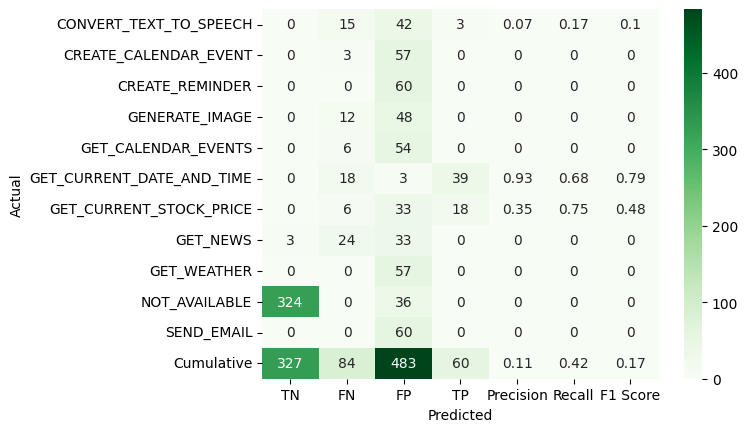

In [26]:
# Plot the confusion matrix
sns.heatmap(summary_aigen13_zeroshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [27]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_aigen13_zeroshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
APIs &  &  &  &  &  &  &  \\
\midrule
CONVERT_TEXT_TO_SPEECH & 0 & 15 & 42 & 3 & 0.07 & 0.17 & 0.10 \\
CREATE_CALENDAR_EVENT & 0 & 3 & 57 & 0 & 0.00 & 0.00 & 0.00 \\
CREATE_REMINDER & 0 & 0 & 60 & 0 & 0.00 & 0.00 & 0.00 \\
GENERATE_IMAGE & 0 & 12 & 48 & 0 & 0.00 & 0.00 & 0.00 \\
GET_CALENDAR_EVENTS & 0 & 6 & 54 & 0 & 0.00 & 0.00 & 0.00 \\
GET_CURRENT_DATE_AND_TIME & 0 & 18 & 3 & 39 & 0.93 & 0.68 & 0.79 \\
GET_CURRENT_STOCK_PRICE & 0 & 6 & 33 & 18 & 0.35 & 0.75 & 0.48 \\
GET_NEWS & 3 & 24 & 33 & 0 & 0.00 & 0.00 & 0.00 \\
GET_WEATHER & 0 & 0 & 57 & 0 & 0.00 & 0.00 & 0.00 \\
NOT_AVAILABLE & 324 & 0 & 36 & 0 & 0.00 & 0.00 & 0.00 \\
SEND_EMAIL & 0 & 0 & 60 & 0 & 0.00 & 0.00 & 0.00 \\
Cumulative & 327 & 84 & 483 & 60 & 0.11 & 0.42 & 0.17 \\
\bottomrule
\end{tabular}

